<font face="Calibri" color="blue" size=10>Locally Weighted Regression</font>

## Regression

**Main Idea**:
 - the output (dependent) variable is continuous and we want to "predict" its value within the range of the input features. (<font color='red'>WARNING: doing otherwise could lead to flawed inferences</font>).
 - there is "noise" which means that for essentially the same input values there may be different slightly different values of the output variable or there is "noise" in the measurement of all the variables.  
 - we assume that the noise (i.e. the errors in measurement) are following a normal distribution with mean 0 and some unknown standard deviation.

**Main Approach**:
- we want to estimate the expected value of the dependent variable as a function of the input features. Thus we want to approximate a conditional expectation $\mathbb{E}(y|\text{input features})$ as a function of the input features such as $$\mathbb{E}(y|X) = f(X)$$

- we want to determine the simplest form of the function $f$ (principle of
parsimony) and we assume that $$y = f(X) + \sigma \epsilon$$ where $\epsilon$ is the "noise", in statistical terms, $\epsilon$ is independent and identically distributed, it follows a standard normal distribution and, $\sigma>0$ is generally unknown.

## Linear Regression

**Main Idea**: Make predictions as a weighted combination of the input feauture values; the weights can be positive or negative. Expressed as an intuitive equation the idea is as follows:

$$\text{Predicted Value} = weight_1 \cdot \text{Feature}_1 + weight_2 \cdot \text{Feature}_2 + ... + weight_p \cdot \text{Feature}_p $$

<font color='darkred' size=4pt>Message: In Machine Learning the "machine" is learning the weights based on iterative processes. Typically, the updates are based on a gradient descent method for minimizing an objective function, such as the sum of squared errors.

## Linear Regression

The main idea of linear regression is the assumption that:

$$\large y = X\cdot\beta +\sigma\epsilon $$

**Important aspect**: linear regression can be seen as a linear combination of the observed outputs (values of the dependent variable).

We have:

$$\large  X^Ty = X^TX\beta +\sigma X^T\epsilon$$

We solve for $\beta$ (by assuming that $X^TX$ is invertible):

$$\large \beta = (X^TX)^{-1}(X^Ty) - \sigma (X^TX)^{-1}X^T\epsilon$$

We take the expected value of this equation and obtain the expected value of the coeffcients:

$$\large \bar{\beta} = (X^TX)^{-1}(X^Ty)$$

Therefore the predictions we make are:

$$\large \hat{y} = X(X^TX)^{-1}(X^Ty)$$

## Locally Weighted Regression

**Main Idea:** Trends and associations are generally nonlinear; however, *locally*, trends can be interpreted linearly.

In this context, local properties are relative to a metric. A metric is a method by which we compute the distance between two observations. Observations contain multiple features, and if they are numeric, we can see them as vectors in a finite-dimensional Euclidean space.

The independent observations are the rows of the matrix $X$. Each row has a number of columns (this is the number of features) and we can denote it by $p.$ As such, every row is a vector in $\mathbb{R}^p.$ The distance between two independent observations is the Euclidean distance between the two represented $p-$dimensional vectors. The equation is:

$$ dist(\vec{v},\vec{w})=\sqrt{(v_1-w_1)^2+(v_2-w_2)^2+...(v_p-w_p)^2}$$

We shall have $n$ different weight vectors because we have $n$ different observations.

## Visual Intuition

<figure>
<center>
<img src="https://i.imgur.com/ycmCaN9.png"
width='500px' />
<figcaption>Intuition for Locally Weighted Regression</figcaption></center>
</figure>

The message of this picture is that we are going to use kernels, such as Gaussian or similar shapes, for solving local linear regression problems.

## A Framework Based on Linear Regression

The main idea of linear regression is the assumption that:

$$\large y = X\cdot\beta +\sigma\epsilon $$

If we pre-multiply this equation with a matrix of weights (the "weights" of observation $i$ are on the main diagonal and the rest of the elements are 0) we get:

$$\large \text{diag}(W(i))y = \text{diag}(W(i))X\cdot\beta +\sigma \text{diag}(W(i))\epsilon $$

The independent observations are the rows of the matrix $X$. Each row has a number of columns (this is the number of features) and we can denote it by $p.$ As such, every row is a vector in $\mathbb{R}^p.$

We shall have $n$ different weight vectors because we have $n$ different observations.

**Important aspect**: linear regression can be seen as a linear combination of the observed outputs (values of the dependent variable). For convenience we can denote $\text{diag}(W(i))$ by just $W.$

We have:

$$\large  X^TWy = X^TWX\beta +\sigma X^TW\epsilon$$

We solve for $\beta$ (by assuming that $X^TX$ is invertible):

$$\large \beta = (X^TWX)^{-1}(X^TWy) - \sigma (X^TX)^{-1}X^TW\epsilon$$

We take the expected value of this equation and obtain the expected value of the coeffcients:

$$\large \bar{\beta} = (X^TWX)^{-1}(X^TWy)$$

Therefore the local predictions we make are:

$$\large \hat{y} = X(X^TWX)^{-1}(X^TWy)$$

In summary, locally weighted regression we have

$$\large \hat{y} = X(X^TWX)^{-1}(X^TWy)$$

The Big Idea: the predictions we make are a linear combination of the actual observed values of the dependent variable!

For locally weighted regression, $\hat{y}$ is obtained as a different linear combination of the values of y.




The following animations are illustrative for how the locally weighte regression works (reference: scikit-lego docs):



<figure>
<center>
<img src='https://i.imgur.com/fPgCjRq.gif'width='840px'/>
<figcaption>Example of how weights work</figcaption></center>
</figure>

<figure>
<center>
<img src='https://i.imgur.com/HfqUZFb.gif'width='840px'/>
<figcaption>Example of how locally weighted regression works</figcaption></center>
</figure>



## Different Kernels

Definition of the kernels: https://en.wikipedia.org/wiki/Kernel_(statistics)

There are many choices of kernels for locally weighted regression. The idea is to have a function with one local maximum that has a compact support.

1.   The Exponential (Gaussian) Kernel

$$ K(x):= e^{-\frac{\|x\|^2}{2\tau}}$$


2.   The Tricubic Kernel

$$ K(x):=\begin{cases}
(1-\|x\|^3)^3 \;\;\;if \;\;\; \|x\|<1 \\
0 \;\;\; \text{otherwise}
\end{cases}
$$

3.   The Epanechnikov Kernel

$$ K(x):=\begin{cases}
\frac{3}{4}(1-\|x\|^2) \;\;\;if \;\;\; \|x\|<1 \\
0 \;\;\; \text{otherwise}
\end{cases}
$$

3.   The Quartic Kernel

$$ K(x):=\begin{cases}
\frac{15}{16}(1-\|x\|^2)^2 \;\;\;if \;\;\; \|x\|<1 \\
0 \;\;\; \text{otherwise}
\end{cases}
$$


## Code Applications
---

In [ ]:
# this block of code imports graphical libraries for plotting graphs with high resolution
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [ ]:
# Libraries of functions need to be imported
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from scipy import linalg
from scipy.interpolate import interp1d

# the following line(s) are necessary if you want to make SKlearn compliant functions
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

In [ ]:
# Gaussian Kernel
def Gaussian(x):
  return np.where(np.abs(x)>4,0,1/(np.sqrt(2*np.pi))*np.exp(-1/2*x**2))

In [ ]:
# this is the correct vectorized version
def tricubic(x):
  return np.where(np.abs(x)>1,0,(1-np.abs(x)**3)**3)

In [ ]:
# Epanechnikov Kernel
def Epanechnikov(x):
  return np.where(np.abs(x)>1,0,3/4*(1-np.abs(x)**2))

In [ ]:
# Quartic Kernel
def Quartic(x):
  return np.where(np.abs(x)>1,0,15/16*(1-np.abs(x)**2)**2)

In [ ]:
kernel = tricubic

In [ ]:
def kernel_function(xi,x0,kern, tau):
    return kern((xi - x0)/(2*tau))

In [ ]:
def weights_matrix(x,kern,tau):
  n = len(x)
  return np.array([kernel_function(x,x[i],kern,tau) for i in range(n)])

In [ ]:
n = len(x)
w = weights_matrix(x,kernel,0.05)

In [ ]:
cars = pd.read_csv("drive/My Drive/Colab Notebooks/mtcars.csv")

In [ ]:
y = cars['mpg'].values

In [ ]:
y

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [ ]:
x = cars.loc[:,'wt'].values

In [ ]:
# we check the dimensionality of X
x.shape

(32,)

In [ ]:
XTX = np.transpose(x).dot(x)

check if the $X^TX$ matrix is invertible

In [ ]:
np.linalg.inv(XTX).dot(np.transpose(X).dot(y))

array([ 0.35082641,  0.01354278, -0.02054767,  1.24158213, -3.8261315 ,
        1.19139689,  0.18972068,  2.8322223 ,  1.05426253, -0.26321386])

In [ ]:
# let's check
from sklearn.linear_model import LinearRegression

In [ ]:
model= LinearRegression(fit_intercept=False)

In [ ]:
model.fit(x,y)
model.coef_

array([ 0.35082641,  0.01354278, -0.02054767,  1.24158213, -3.8261315 ,
        1.19139689,  0.18972068,  2.8322223 ,  1.05426253, -0.26321386])

In [ ]:
cars = cars.sort_values(by='wt')

### This is he actual scatter plot connnecting weight and mileage

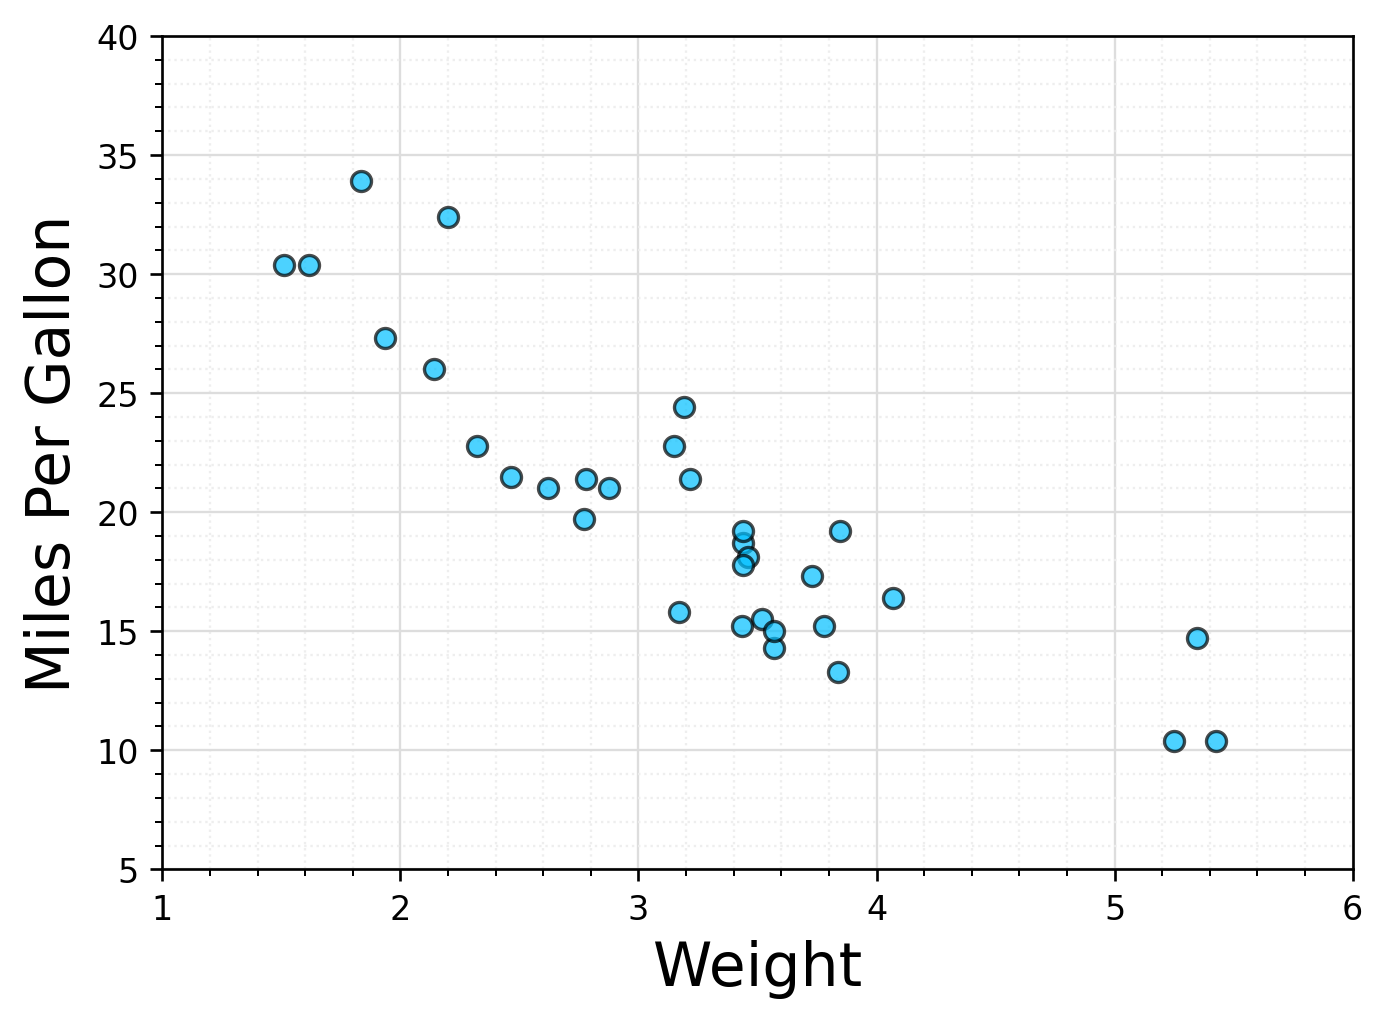

In [ ]:
# from matplotlib.figure import figaspect
fig, ax = plt.subplots(1,1)
ax.scatter(cars["wt"],cars["mpg"],color='deepskyblue',ec='k',alpha=0.7)
plt.xlabel('Weight',fontsize=18)
plt.ylabel('Miles Per Gallon',fontsize=18)
ax.grid()
plt.xlim(1,6)
plt.ylim(5,40)
ax.grid(which='major', color='#DDDDDD', linewidth=0.7)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
ax.set_axisbelow(True)
plt.minorticks_on()
#we can set aspect ratio for the figure
ratio = 0.7
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
plt.savefig("mtcars.svg")

In [ ]:
x_range = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)

In [ ]:
x = cars["wt"].values
y = cars["mpg"].values
lm = linear_model.LinearRegression()
model = lm.fit(x.reshape(-1,1),y)
xhat = np.array([1.1,5.9]).reshape(-1,1)
yhat = lm.predict(xhat)

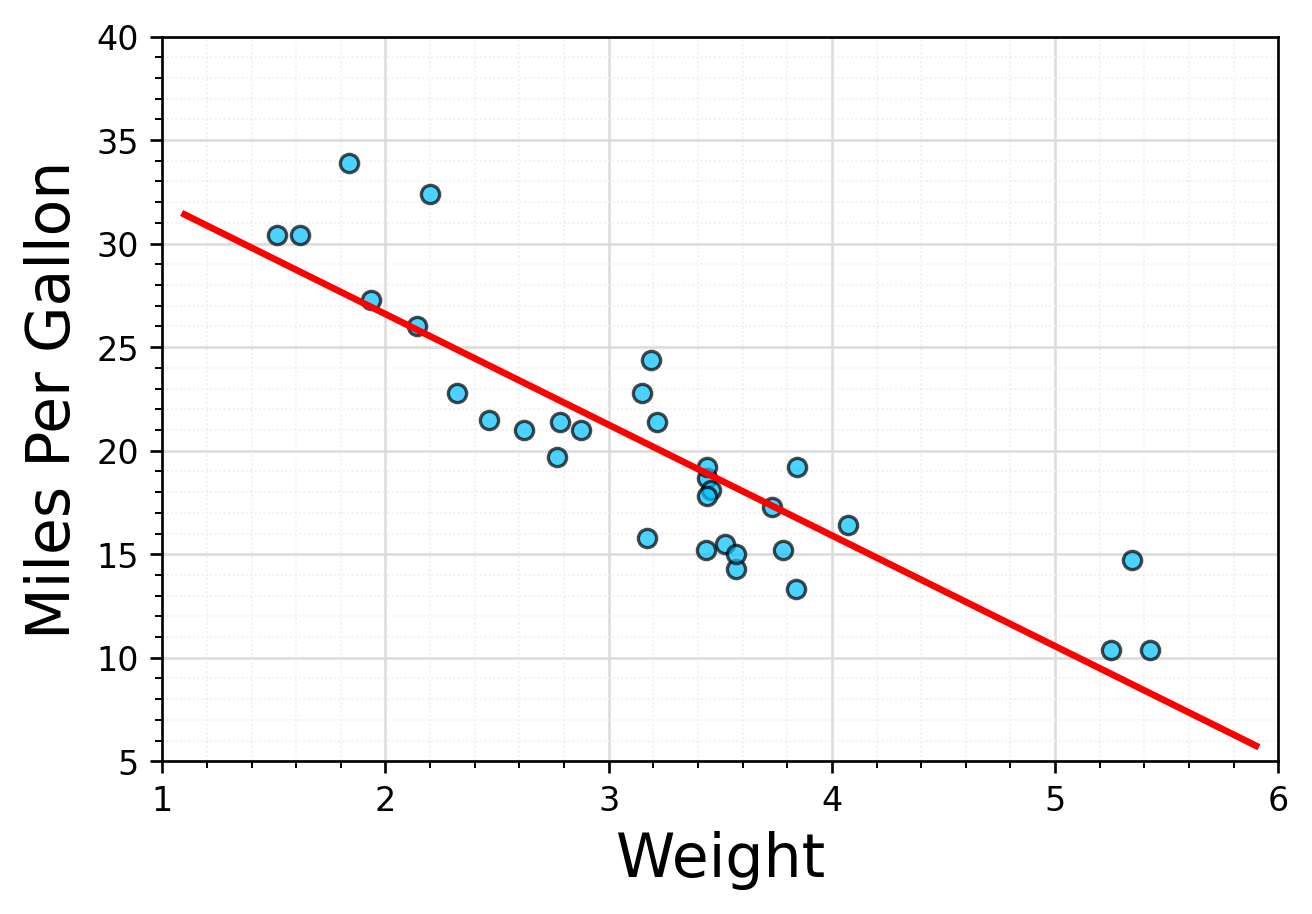

In [ ]:
fig, ax = plt.subplots(1,1)
plt.plot(xhat, yhat, '-',color='red',lw=2)
plt.scatter(cars["wt"],cars["mpg"],color='deepskyblue',ec='k',s=30,alpha=0.7)
plt.xlim(1,6)
plt.ylim(5,40)
plt.xlabel('Weight',fontsize=18)
plt.ylabel('Miles Per Gallon',fontsize=18)
ax.grid()
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.set_axisbelow(True)
plt.minorticks_on()
plt.savefig("mtcars_line.png")

In [ ]:
#Defining the bell shaped kernel function - used for plotting later on
def kernel_function(xi,x0,tau= .005):
    return np.exp( - (xi - x0)**2/(2*tau))

In [ ]:
def weights_matrix(x,tau):
  n = len(x)
  return np.array([np.exp(- (x - x[i])**2/(2*tau)) for i in range(n)])

In [ ]:
w = weights_matrix(x,0.05)

In [ ]:
w.shape

(32, 32)

In [ ]:
#@title
def lowess_bell_shape_kern1(x, y, tau = .005):
    """lowess_bell_shape_kern(x, y, tau = .005) -> the estimate of y denoted "yest"
    Locally weighted regression: fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The kernel function is the bell shaped function with parameter tau. Larger tau will result in a
    smoother curve.
    """
    n = len(x)
    yest = np.zeros(n)

    #Initializing all weights from the bell shape kernel function
    # here w is an nxn matrix
    w = weights_matrix(x,tau)

    #Looping through all x-points
    for i in range(n):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta = linalg.solve(A, b)
        yest[i] = theta[0] + theta[1] * x[i]

    return yest

In [ ]:
def lowess_bell_shape_kern(x, y, tau = .005):
    """lowess_bell_shape_kern(x, y, tau = .005) -> the estimate of y denoted "yest"
    Locally weighted regression: fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The kernel function is the bell shaped function with parameter tau. Larger tau will result in a
    smoother curve.
    """
    n = len(x)
    yest = np.zeros(n)

    #Initializing all weights from the bell shape kernel function
    # here w is an nxn matrix
    w = weights_matrix(x,tau)

    #Looping through all x-points
    for i in range(n):
        weights = w[:, i]
        lm.fit(np.diag(w[:,i]).dot(x.reshape(-1,1)),np.diag(w[:,i]).dot(y.reshape(-1,1)))
        yest[i] = lm.predict(x[i].reshape(-1,1))

    return yest

In [ ]:
yhat = lowess_bell_shape_kern(x,y, tau= .03)

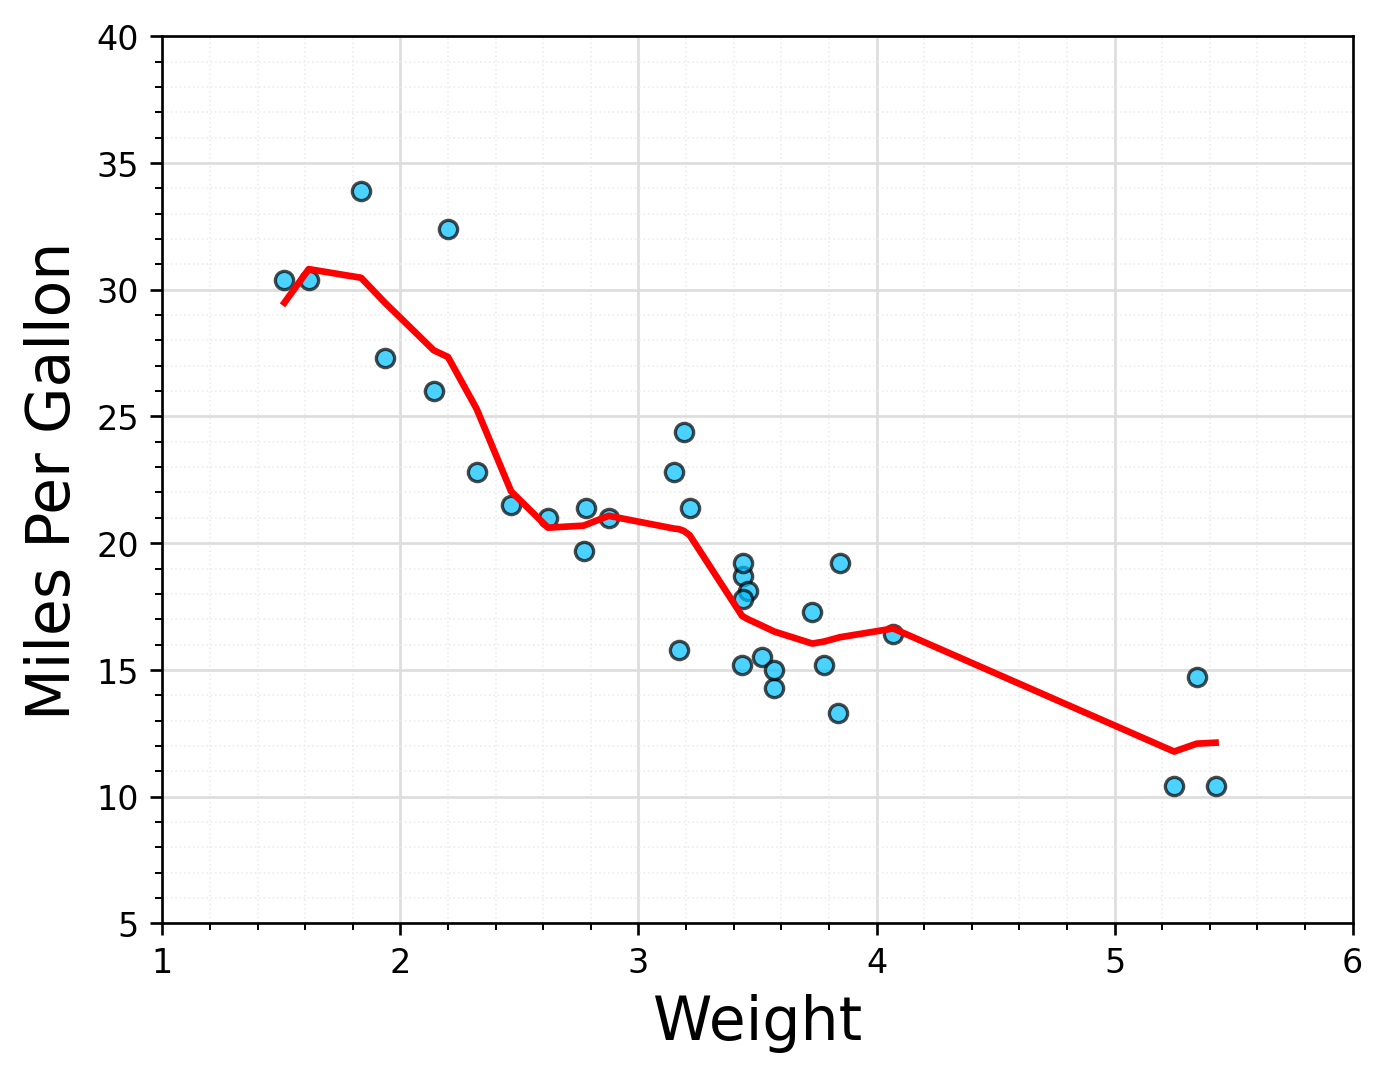

In [ ]:
fig, ax = plt.subplots(1,1)
plt.plot(x[np.argsort(x)], yhat[np.argsort(x)], '-',color='red',lw=2)
plt.scatter(cars["wt"],cars["mpg"],color='deepskyblue',ec='k',s=30,alpha=0.7)
plt.xlim(1,6)
plt.ylim(5,40)
plt.xlabel('Weight',fontsize=18)
plt.ylabel('Miles Per Gallon',fontsize=18)
ax.grid()
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.set_axisbelow(True)
plt.minorticks_on()
plt.savefig("mtcars_line.png")

Interpretation: we expect to see on average an 5.34mpg drop if the weight of the car increases by 1 ton.

## Loess from Statsmodels Library

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
lowess = sm.nonparametric.lowess

In [ ]:
# this is just an example with a simulated nonlinear relationship such as a sine wave
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
x = np.sort(x)
y = np.sin(x) + 0.5*np.random.normal(size=len(x))

In [ ]:
# we can apply our function defined earlier
yhat1 = lowess_bell_shape_kern(x,y,tau=0.05)

In [ ]:
yhat2 = lowess(y, x, frac= 1/5, return_sorted = False)

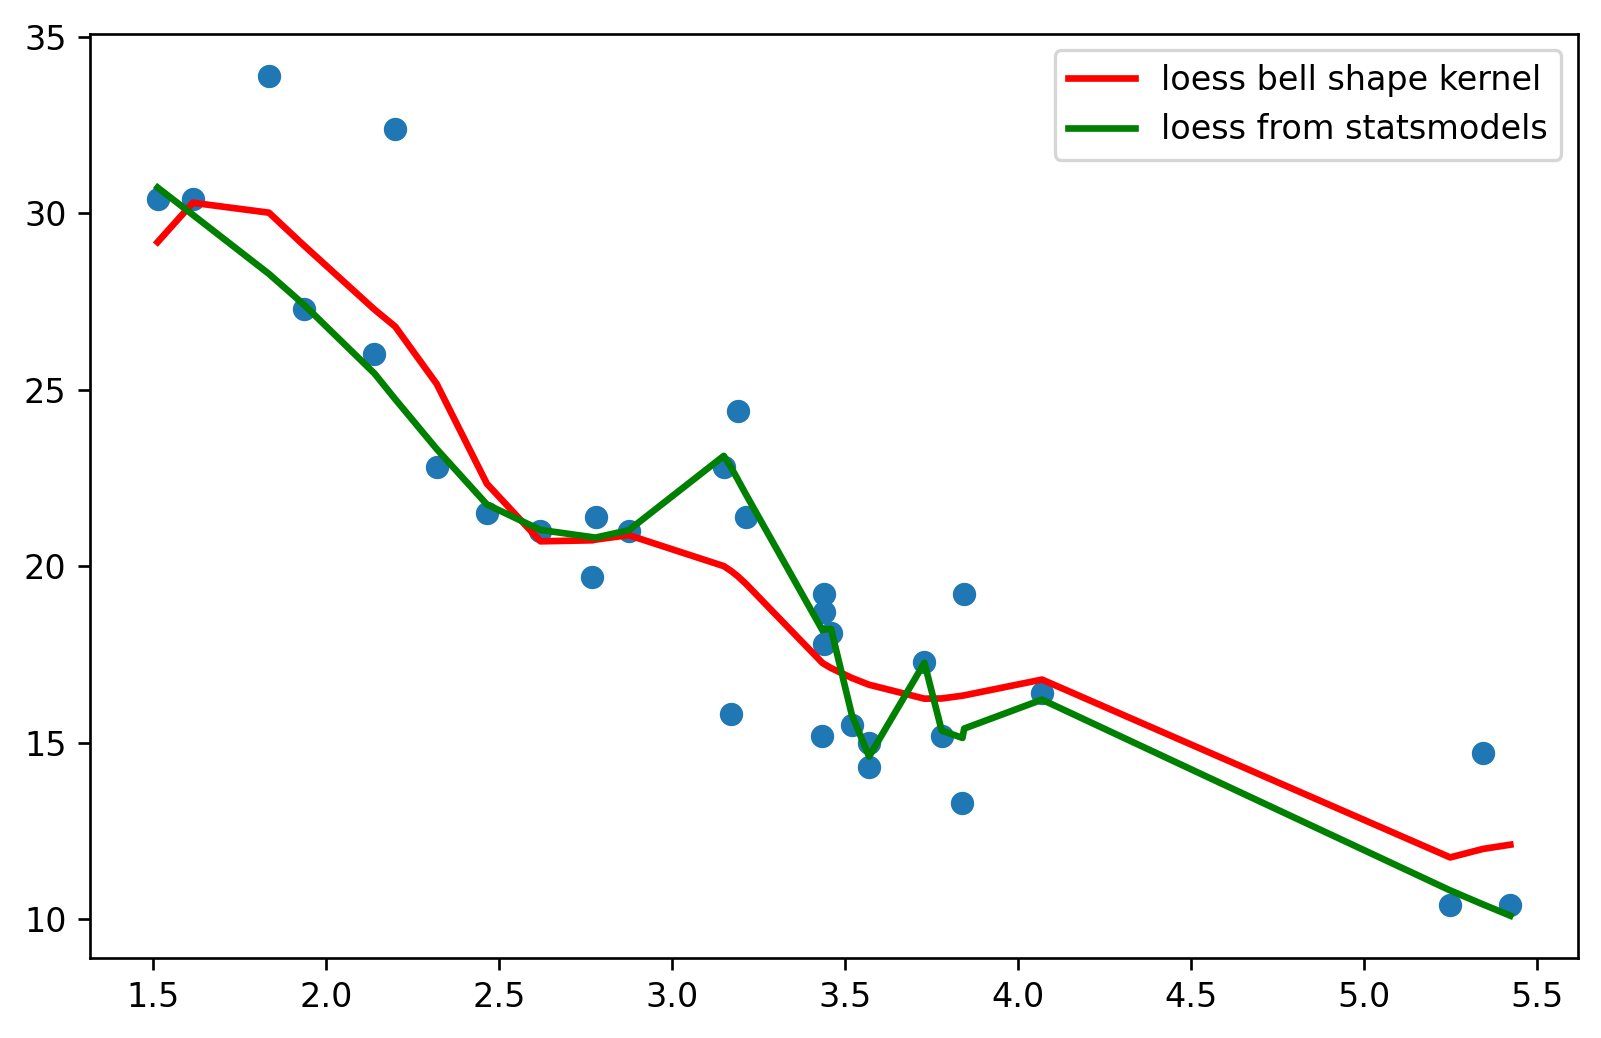

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.plot(x[np.argsort(x)],yhat1[np.argsort(x)],lw=2,color='red',label='loess bell shape kernel')
plt.plot(x[np.argsort(x)],yhat2[np.argsort(x)],lw=2,color='green',label='loess from statsmodels')
plt.legend()
plt.show()

In [ ]:
mse(yhat1,y), mse(yhat2,y)

(5.128228682121883, 6.047375715858724)

## Use of Different Kernels

In [ ]:
lm = linear_model.LinearRegression()

In [ ]:
kernel = tricubic

In [ ]:
def kernel_function(xi,x0,kern, tau):
    return kern((xi - x0)/(2*tau))

In [ ]:
def weights_matrix(x,kern,tau):
  n = len(x)
  return np.array([kernel_function(x,x[i],kern,tau) for i in range(n)])

In [ ]:
n = len(x)
w = weights_matrix(x,kernel,0.05)

In [ ]:
def lowess(x, y, kern, tau=0.05):
    # tau is called bandwidth K((x-x[i])/(2*tau))
    # tau is a hyper-parameter
    n = len(x)
    yest = np.zeros(n)

    #Initializing all weights from the bell shape kernel function
    #Looping through all x-points

    w = weights_matrix(x,kern,tau)

    #Looping through all x-points
    for i in range(n):
        weights = w[:, i]
        lm.fit(np.diag(w[:,i]).dot(x.reshape(-1,1)),np.diag(w[:,i]).dot(y.reshape(-1,1)))
        yest[i] = lm.predict(x[i].reshape(-1,1))

    return yest

### Reference
https://xavierbourretsicotte.github.io/loess.html

In [ ]:
yest = lowess(x,y,kernel,0.04)

In [ ]:
yest

array([21.        , 21.        , 22.8       , 21.88424229, 17.78234475,
       17.91665011, 14.73802962, 20.9767143 , 20.30265192, 17.78234475,
       17.78234475, 16.4       , 16.93338264, 15.50314136, 10.4       ,
       10.40000001, 14.69999999, 32.21051582, 30.4       , 33.9       ,
       21.5       , 15.2878792 , 17.75146561, 16.22532852, 16.26091241,
       27.3       , 26.20518287, 30.4       , 20.86205056, 20.5096755 ,
       14.73802962, 20.59327224])

## Another Implementation - A Theory-based Robust Approach

### Gramfort's Approach

The idea is based on the following references:

- William S. Cleveland: "Robust locally weighted regression and smoothing
scatterplots", Journal of the American Statistical Association, December 1979,
volume 74, number 368, pp. 829-836.

- William S. Cleveland and Susan J. Devlin: "Locally weighted regression: An
approach to regression analysis by local fitting", Journal of the American
Statistical Association, September 1988, volume 83, number 403, pp. 596-610.

The main idea is to perform a local linear regression in a neighborhood of k observations close by and then apply an iteration to rescale the weights based on the residuals; this step is argued to yield a more robust model.

In [ ]:
# approach by Alex Gramfort https://gist.github.com/agramfort

def lowess_ag(x, y, f=2. / 3., iter=3):
    """lowess(x, y, f=2./3., iter=3) -> yest
    Lowess smoother: Robust locally weighted regression.
    The lowess function fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The smoothing span is given by f. A larger value for f will result in a
    smoother curve. The number of robustifying iterations is given by iter. The
    function will run faster with a smaller number of iterations.
    """
    n = len(x)
    r = int(np.ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest

## Applications with Simulated Data

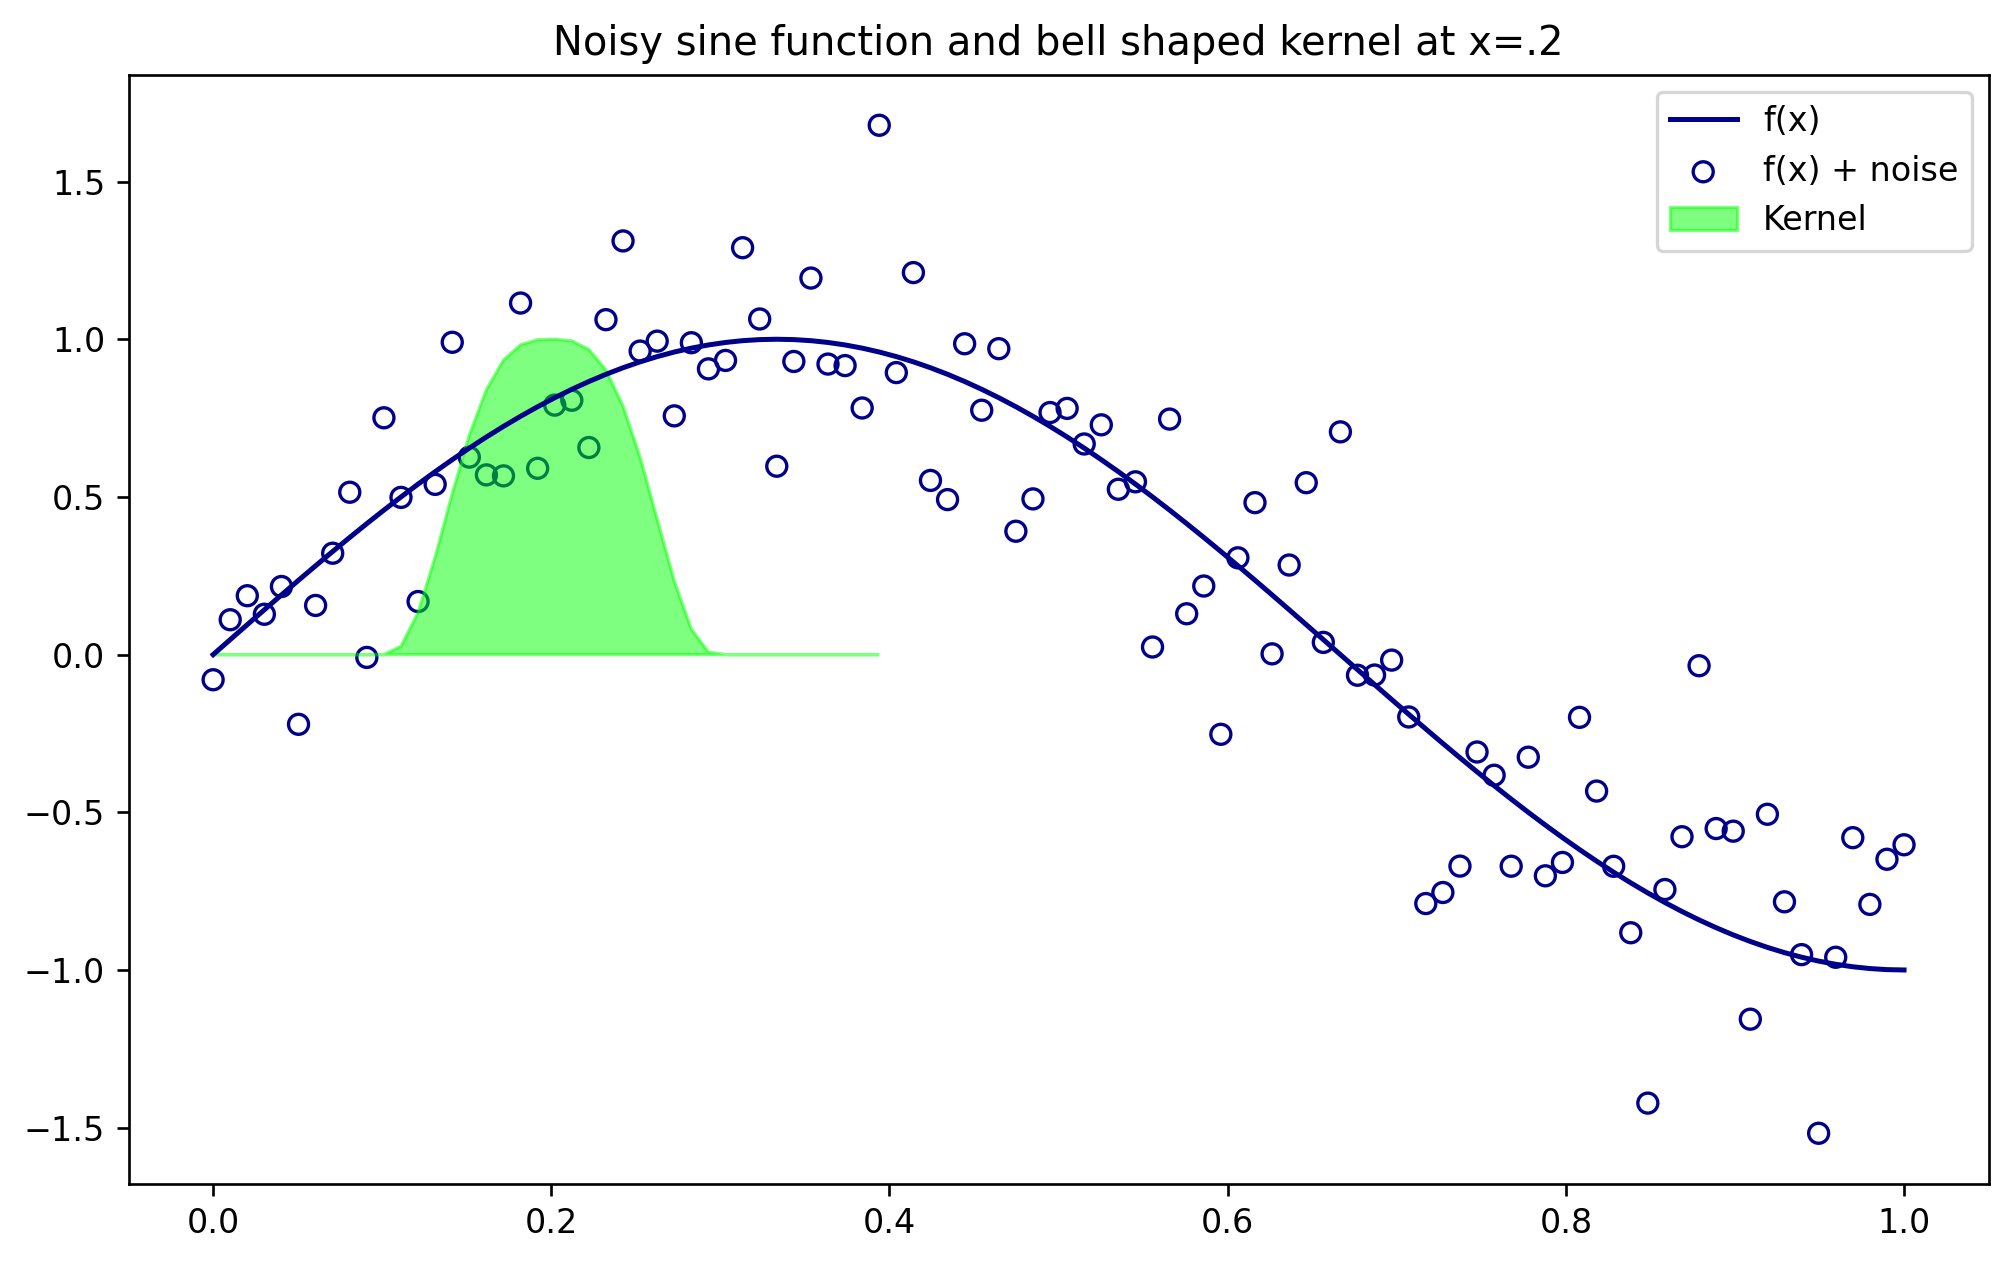

In [ ]:
#Initializing noisy non linear data
x = np.linspace(0,1,100)
noise = np.random.normal(loc = 0, scale = .25, size = 100)
y = np.sin(x * 1.5 * np.pi )
y_noise = y + noise

#Plotting the noisy data and the kernell at around x = 0.2
plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'darkblue', label = 'f(x)')
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'f(x) + noise')
plt.fill(x[:40],kernel_function(x[:40],0.2,kernel,.05), color = 'lime', alpha = .5, label = 'Kernel')
plt.legend()
plt.title('Noisy sine function and bell shaped kernel at x=.2')
plt.show()

In [ ]:
# application of the two flavors of Loess
f = 0.25
yest1 = lowess_ag(x, y, f=f, iter=3)
yest2 = lowess(x,y,kernel,0.04)

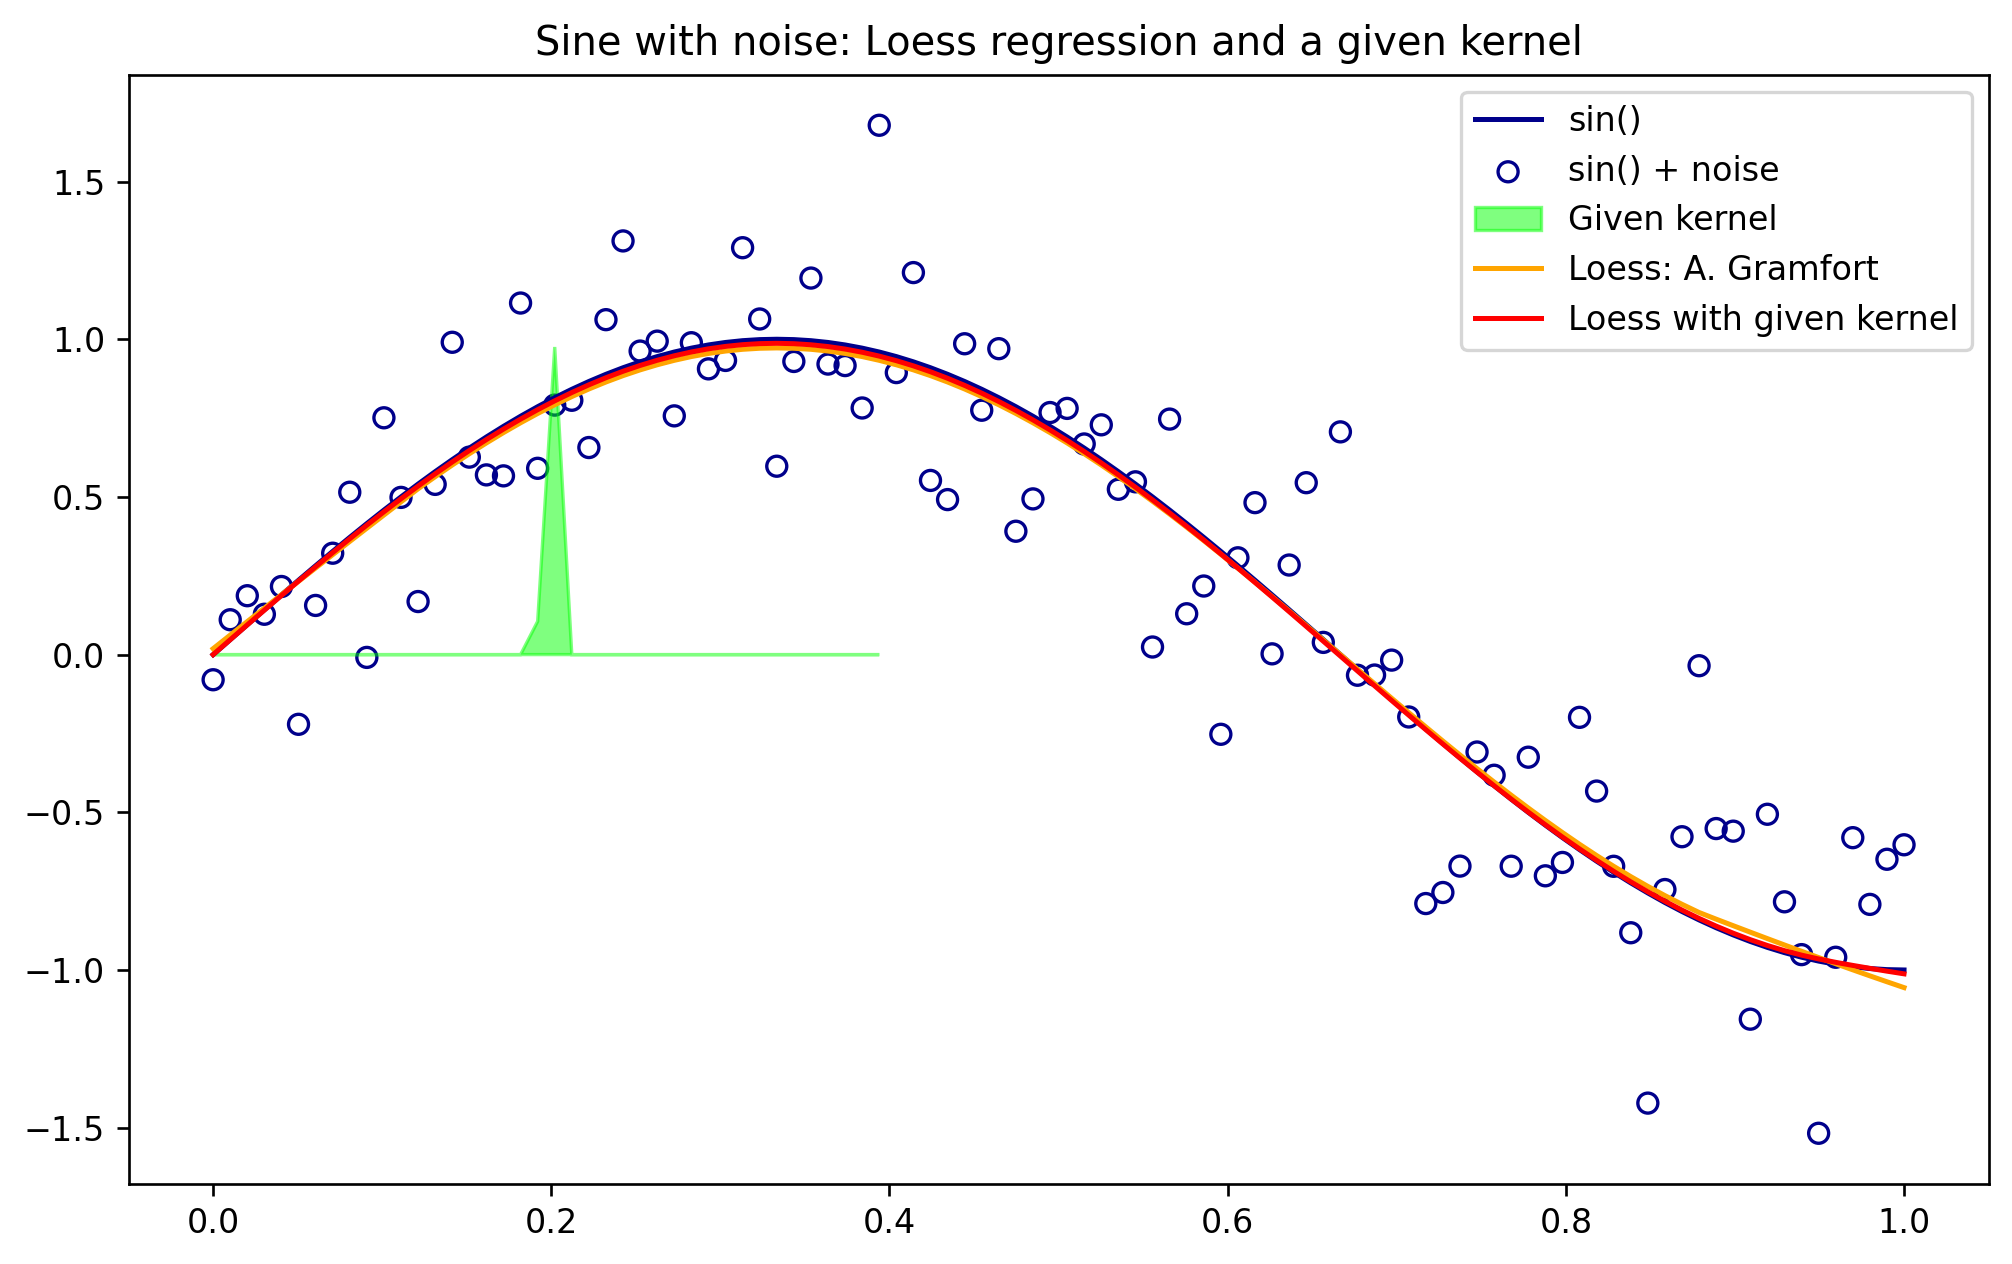

In [ ]:
# display what we got
plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'darkblue', label = 'sin()')
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'sin() + noise')
plt.fill(x[:40],kernel_function(x[:40],0.2,kernel,.005), color = 'lime', alpha = .5, label = 'Given kernel')
plt.plot(x,yest1,color = 'orange', label = 'Loess: A. Gramfort')
plt.plot(x,yest2,color = 'red', label = 'Loess with given kernel')
plt.legend()
plt.title('Sine with noise: Loess regression and a given kernel')
plt.show()

## Another example

In [ ]:
#Initializing noisy non linear data
x = np.linspace(0,4,400)
noise = np.random.normal(loc = 0, scale = .8, size = 400)
y = np.sin(x**2 * 1.5 * np.pi )
y_noise = y + noise

In [ ]:
xlr = x.reshape(-1,1)
y_noiselr = y_noise.reshape(-1,1)

In [ ]:
# we want to compare with linear regression
yhat_lr = lr.predict(xlr)

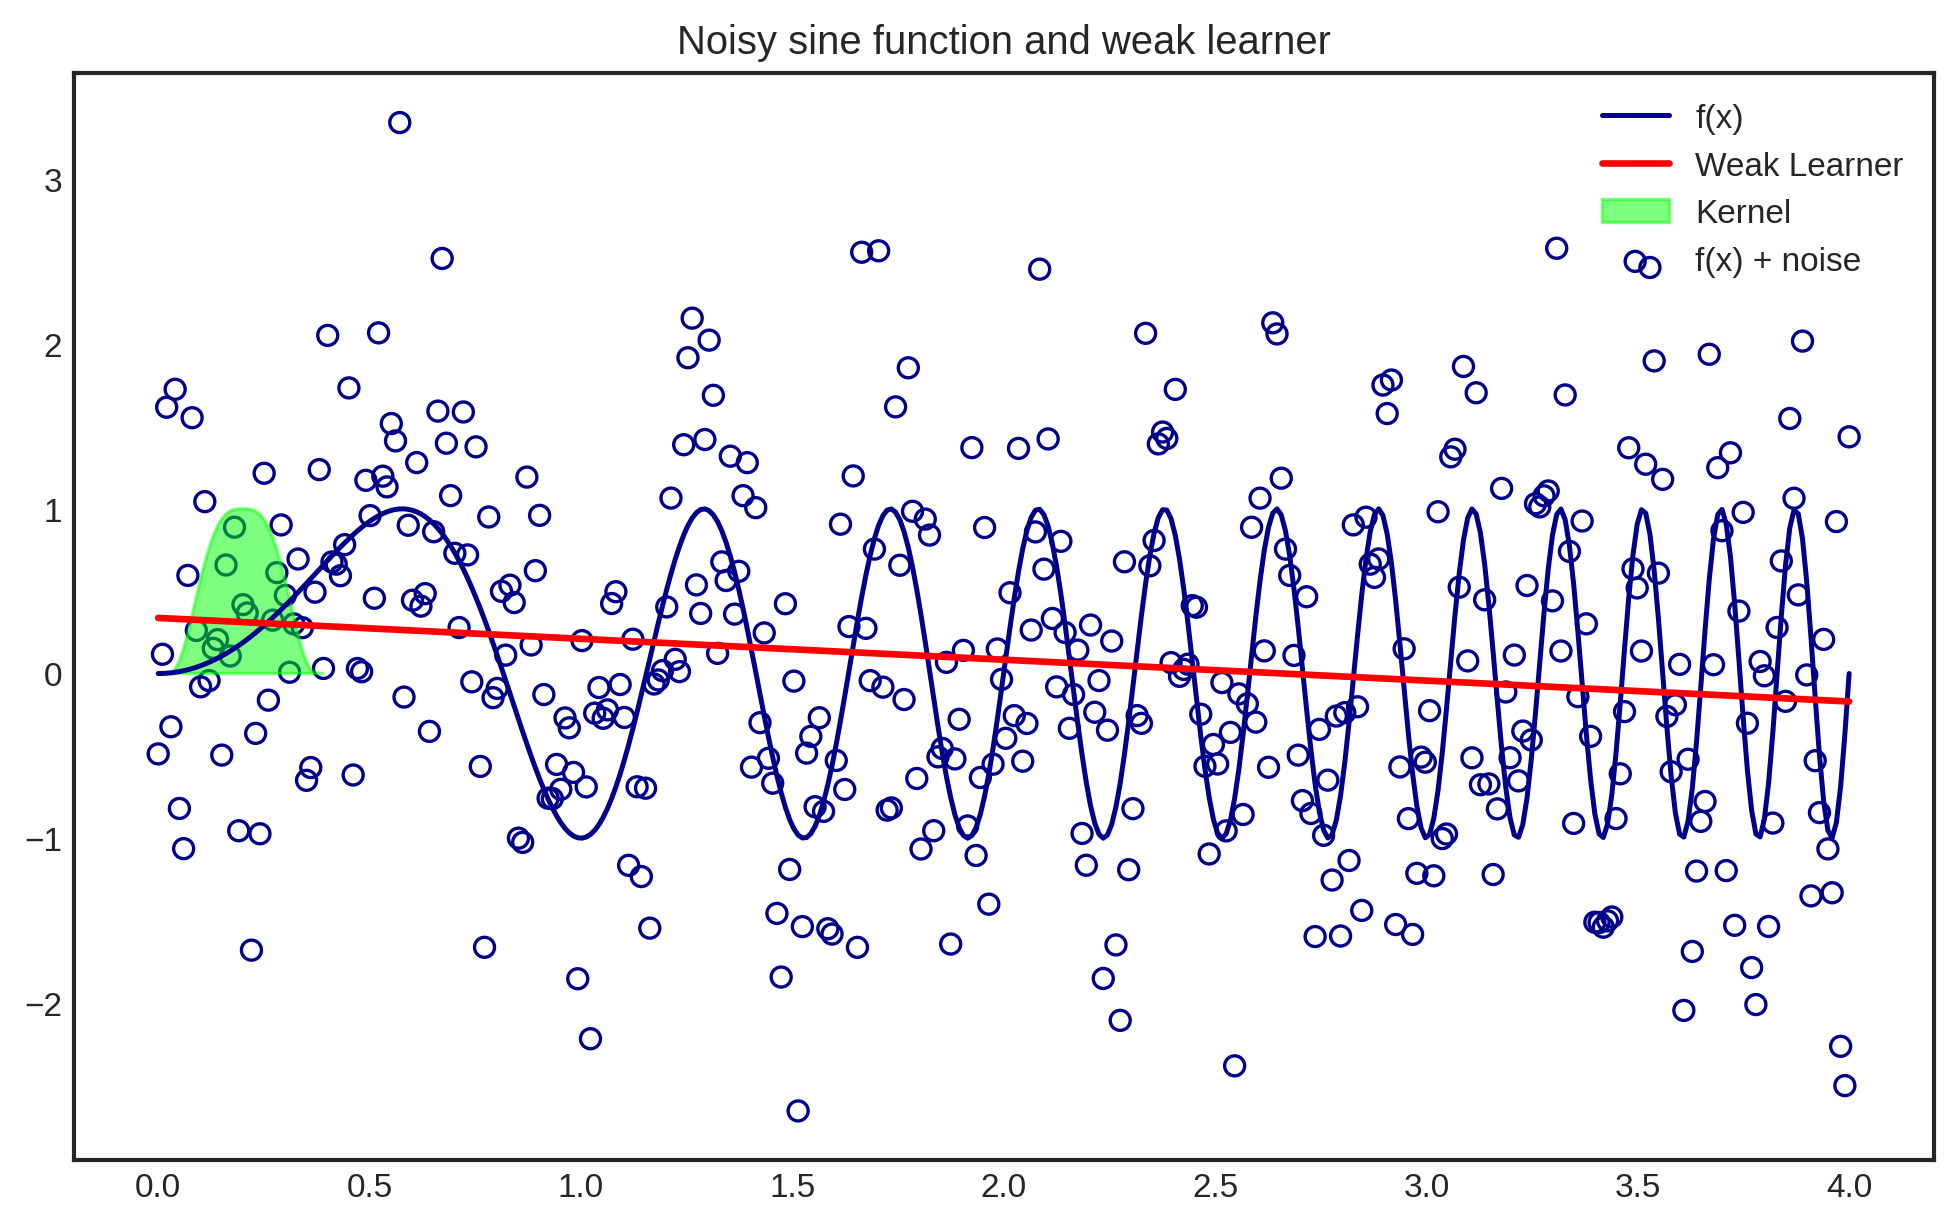

In [ ]:
#Plotting the noisy data and the kernell at around x = 0.2
plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'darkblue', label = 'f(x)')
plt.plot(xlr,yhat_lr,color='red',lw=2,label = 'Weak Learner')
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'f(x) + noise')
plt.fill(x[:40],kernel_function(x[:40],0.2,tricubic,.09), color = 'lime', alpha = .5, label = 'Kernel')
plt.legend()
plt.title('Noisy sine function and weak learner')
plt.show()

In [ ]:
## here is where we make predictions with our kernel
tau = 0.009

yhat_kern = lowess(x,y,tricubic,tau)

f = 0.02
yest = lowess_ag(x, y, f=f, iter=3)

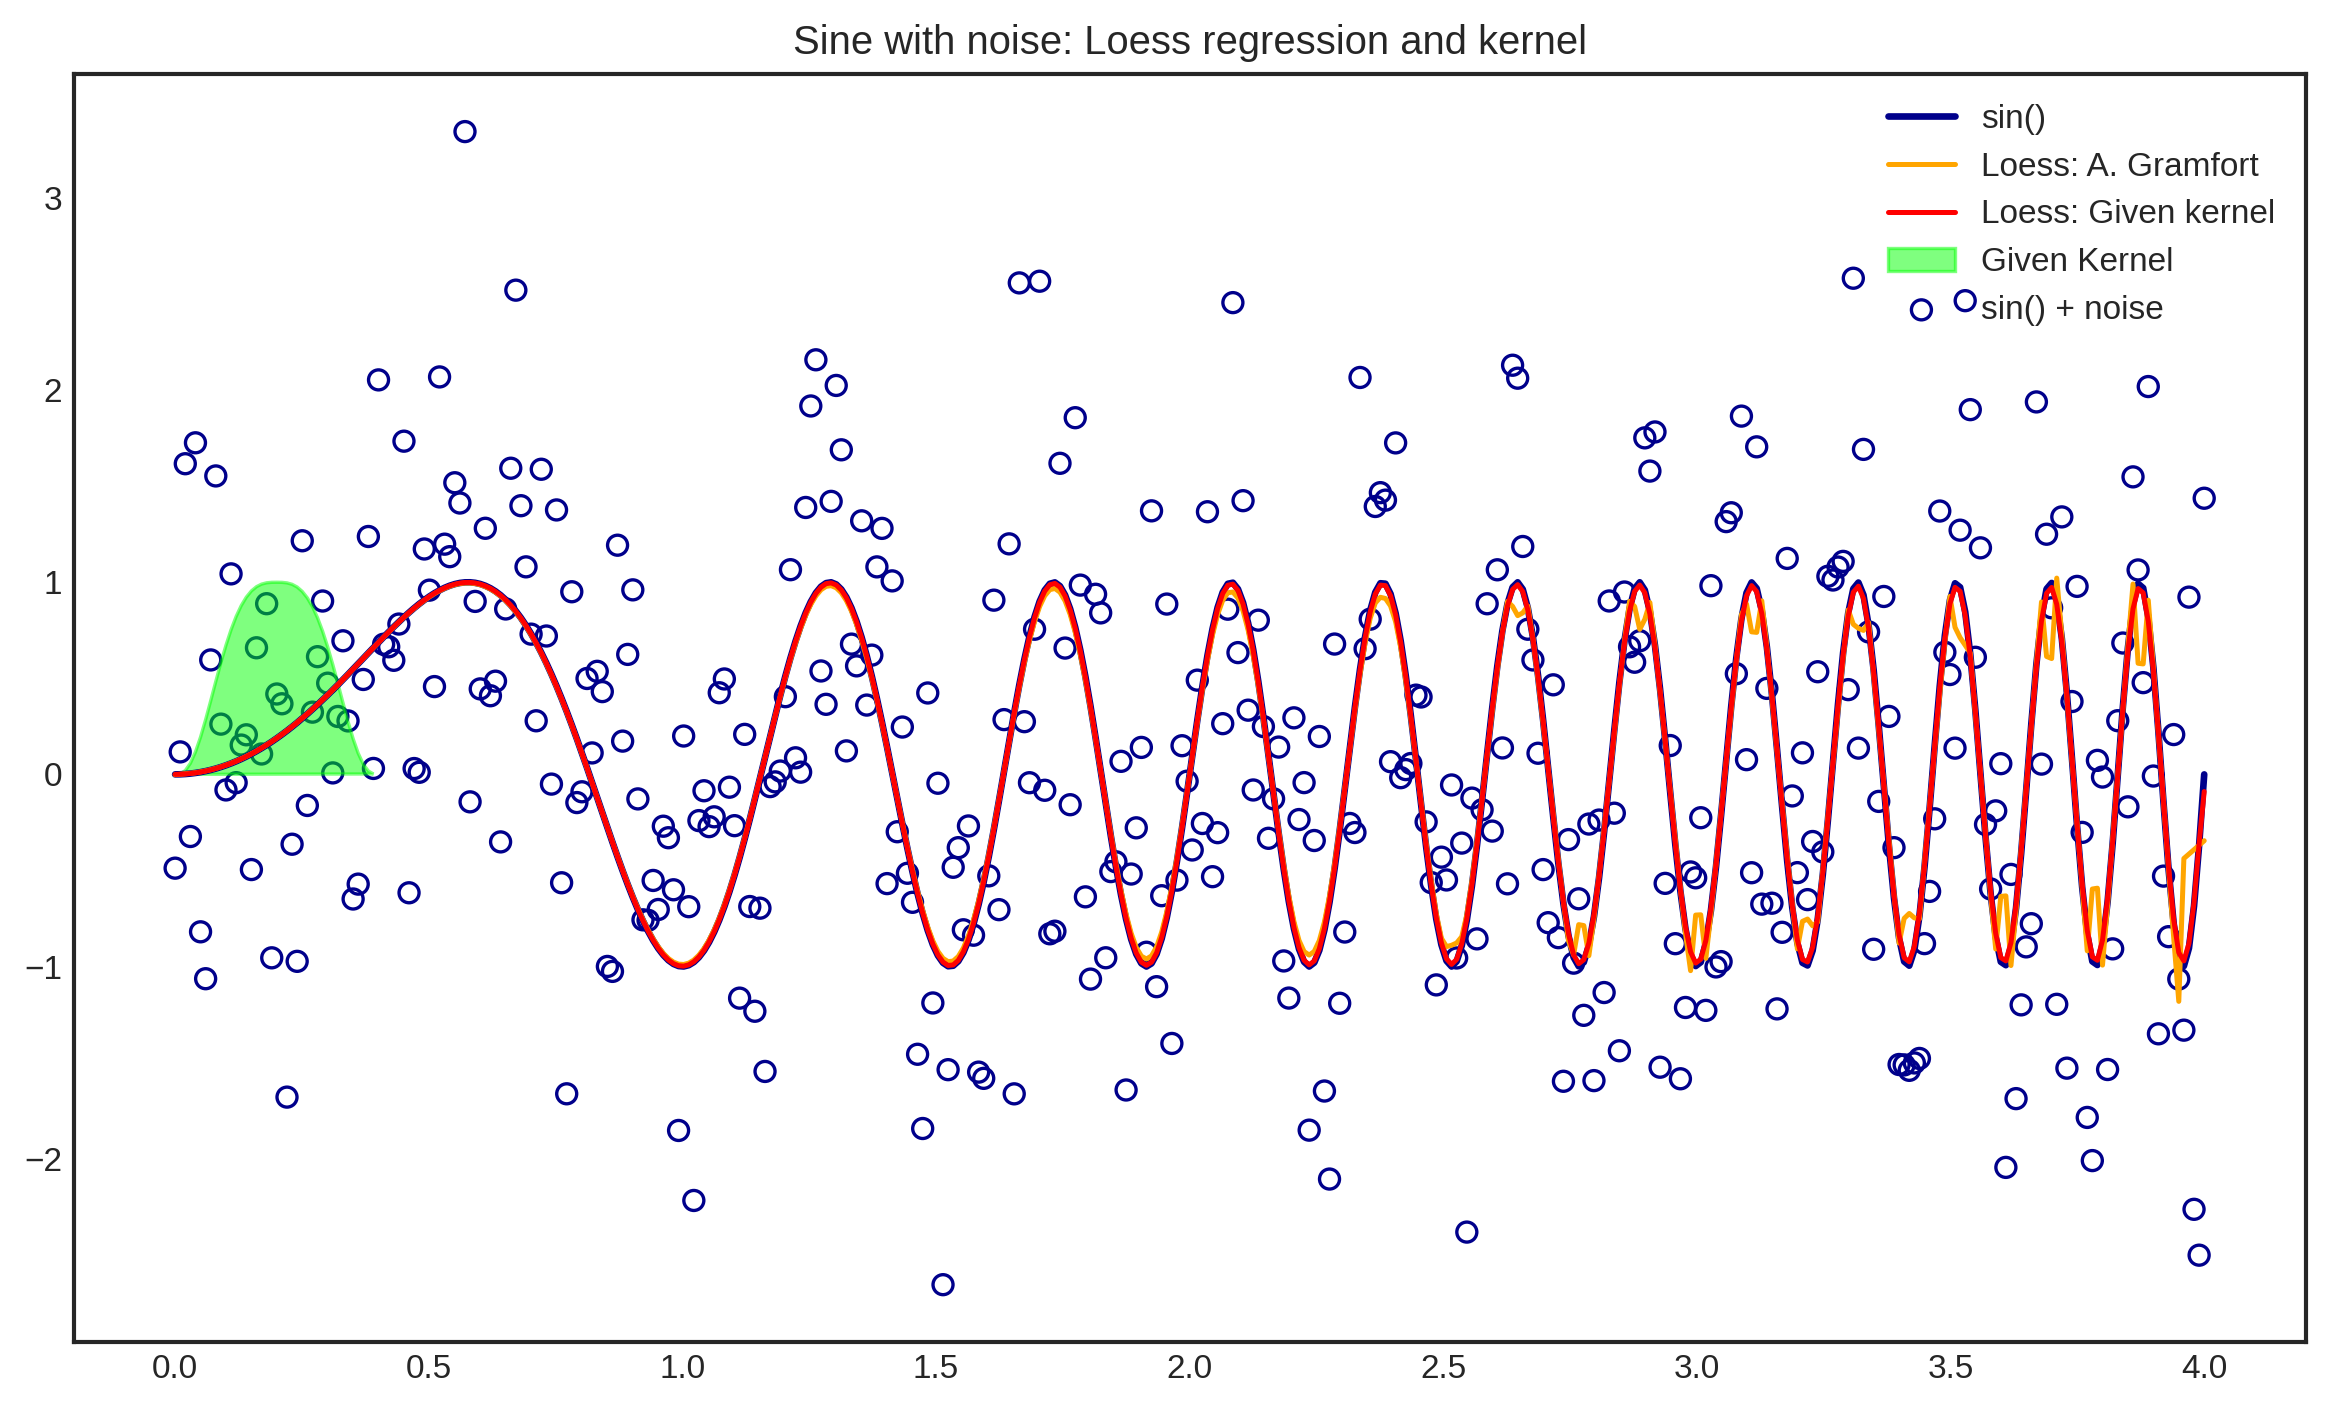

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(x,y,color = 'darkblue', label = 'sin()',lw=2)
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'sin() + noise')
plt.fill(x[:40],kernel_function(x[:40],0.2,tricubic,0.1), color = 'lime', alpha = .5, label = 'Given Kernel')
plt.plot(x,yest,color = 'orange', label = 'Loess: A. Gramfort')
plt.plot(x,yhat_kern,color = 'red', label = 'Loess: Given kernel')
plt.legend()
plt.title('Sine with noise: Loess regression and kernel')
plt.show()

##<font face='calibri' color='blue' size=6px>Data Applications</font>

First let's make a more usable function:

In [ ]:
def lowess_reg(x, y, xnew, kern, tau):
    # tau is called bandwidth K((x-x[i])/(2*tau))
    # IMPORTANT: we expect x to the sorted increasingly
    n = len(x)
    yest = np.zeros(n)

    #Initializing all weights from the bell shape kernel function
    w = np.array([kern((x - x[i])/(2*tau)) for i in range(n)])

    #Looping through all x-points
    for i in range(n):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        #theta = linalg.solve(A, b) # A*theta = b
        theta, res, rnk, s = linalg.lstsq(A, b)
        yest[i] = theta[0] + theta[1] * x[i]
    f = interp1d(x, yest,fill_value='extrapolate')
    return f(xnew)


In [ ]:
data = pd.read_csv('drive/MyDrive/Data Sets/cars.csv')

In [ ]:
data

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449
...,...,...,...,...
387,27.0,4,140.0,2790
388,44.0,4,97.0,2130
389,32.0,4,135.0,2295
390,28.0,4,120.0,2625


In [ ]:
x = data['WGT'].values
y = data['MPG'].values

In [ ]:
lowess_reg(x,y,3200,tricubic,1)

array(17.85)

In [ ]:
data

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449
...,...,...,...,...
387,27.0,4,140.0,2790
388,44.0,4,97.0,2130
389,32.0,4,135.0,2295
390,28.0,4,120.0,2625


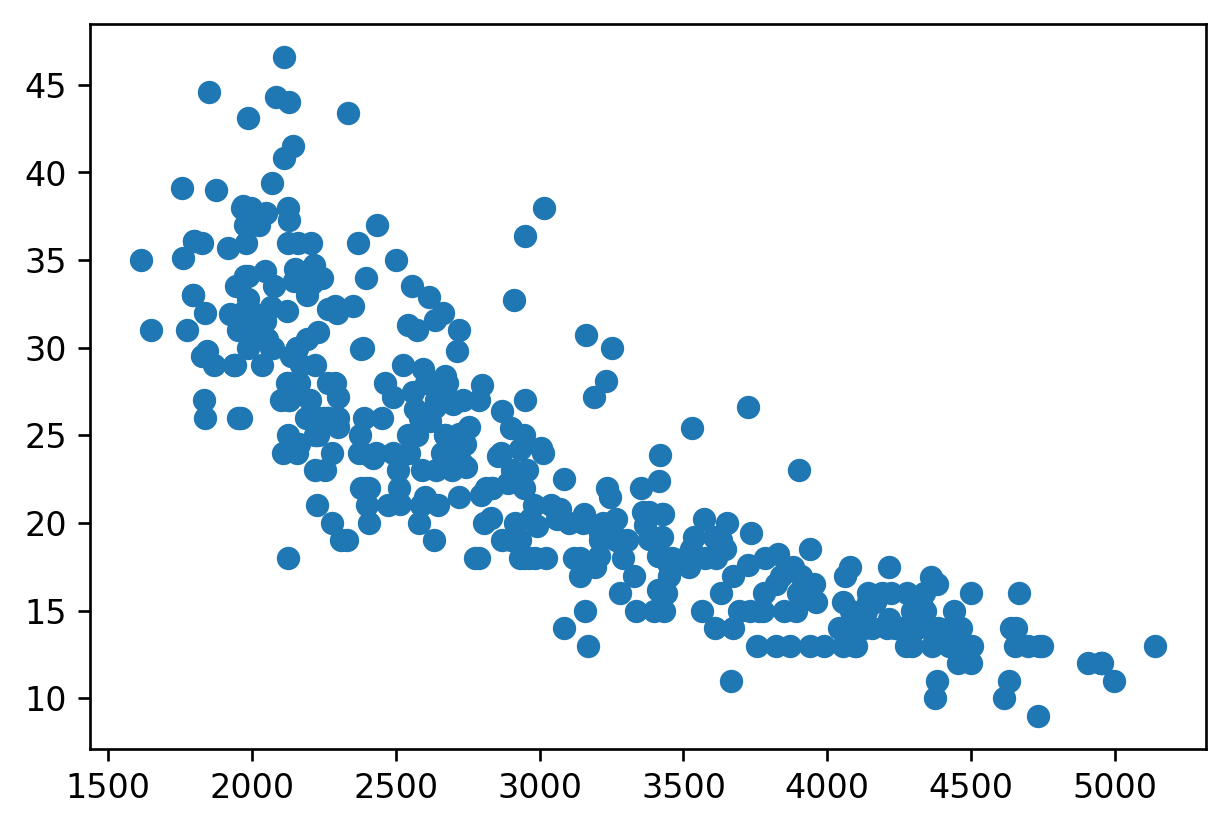

In [ ]:
plt.scatter(data['WGT'],data['MPG'])

In [ ]:
xnew = np.arange(1500,5500,10)

In [ ]:
yhat = lowess_reg(x,y,xnew,tricubic,150)

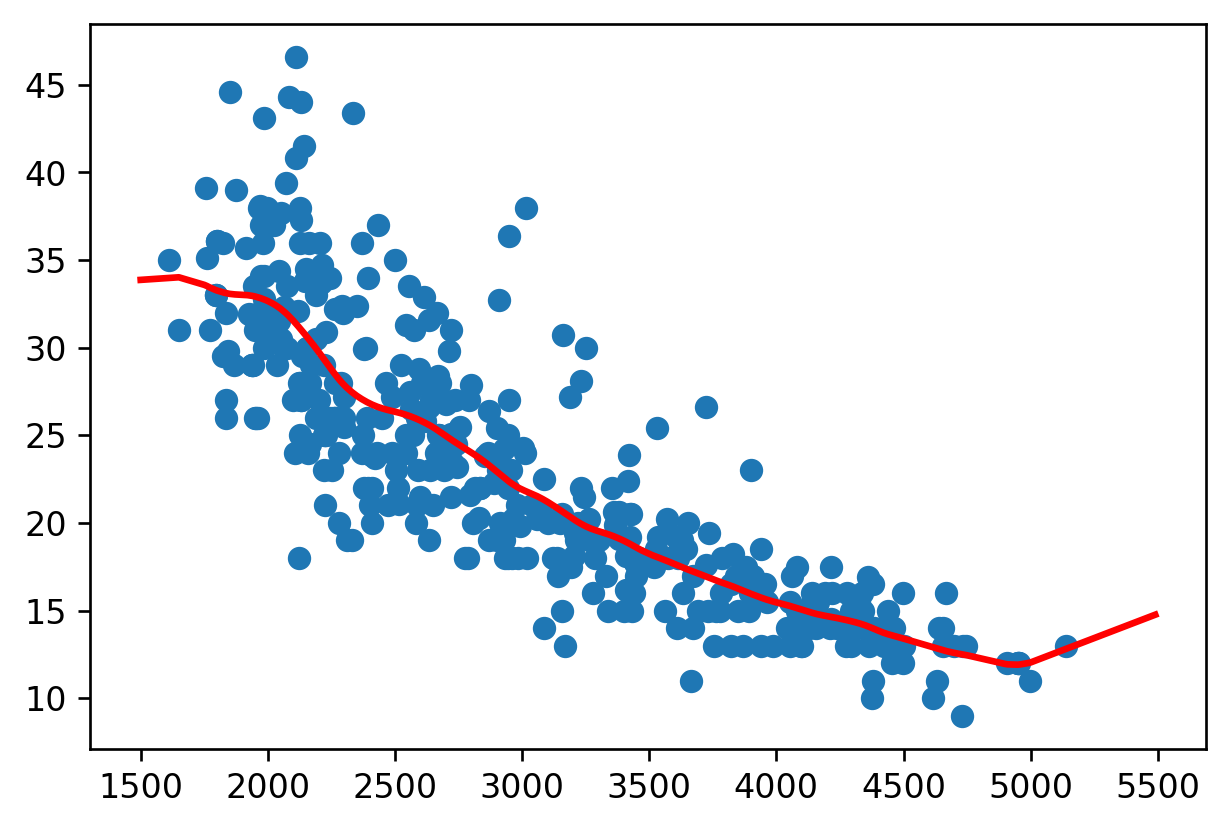

In [ ]:
plt.scatter(data['WGT'],data['MPG'])
plt.plot(xnew,yhat,color='red',lw=2)

## Applications with Train & Test Data

Big Idea: we need to acommodate new data points in a test set. We can only get weights from the train set.

In [ ]:
def kernel_function(xi,x0,kern, tau):
    return kern((xi - x0)/(2*tau))

In [ ]:
def weights_matrix(x,x_new,kern,tau):
  if np.isscalar(x_new):
    return kernel_function(x,x_new,kern,tau)
  else:
    n = len(x_new)
    return np.array([kernel_function(x,x_new[i],kern,tau) for i in range(n)])

In [ ]:
def lowess(x, y,x_new, kern, tau=0.05):
    # tau is called bandwidth K((x-x[i])/(2*tau))
    # tau is a hyper-parameter
    w = weights_matrix(x,x_new,kern,tau)
    if np.isscalar(x_new):
      lm.fit(np.diag(w).dot(x.reshape(-1,1)),np.diag(w).dot(y.reshape(-1,1)))
      yest = lm.predict([[x_new]])[0][0]
    else:
      n = len(x_new)
      yest = np.zeros(n)
      #Looping through all x-points
      for i in range(n):
        lm.fit(np.diag(w[i,:]).dot(x.reshape(-1,1)),np.diag(w[i,:]).dot(y.reshape(-1,1)))
        yest[i] = lm.predict(x_new[i].reshape(-1,1))

    return yest

## Scikit-Learn Compliant Functions

Main Idea: we want to define a model regressor that can be used as model.fit/model.predict, and that also allows sklearn GridSearchCV for tuning hyperparameters.

*Self* represents the instance of the class. By using the “self”  we can access the attributes and methods of the class in python. It binds the attributes with the given arguments.

In [ ]:
class Lowess:
    def __init__(self, kernel = Gaussian, tau=0.05):
        self.kernel = kernel
        self.tau = tau

    def fit(self, x, y):
        kernel = self.kernel
        tau = self.tau
        # w = weights_matrix(x,x,kernel,tau)
        # if np.isscalar(x):
        #   lm.fit(np.diag(w).dot(x.reshape(-1,1)),np.diag(w).dot(y.reshape(-1,1)))
        #   yest = lm.predict([[x]])[0][0]
        # else:
        #   n = len(x)
        #   yest = np.zeros(n)
        #   #Looping through all x-points
        #   for i in range(n):
        #     lm.fit(np.diag(w[i,:]).dot(x.reshape(-1,1)),np.diag(w[i,:]).dot(y.reshape(-1,1)))
        #     yest[i] = lm.predict(x[i].reshape(-1,1))
        self.xtrain_ = x
        self.yhat_ = y

    def predict(self, x_new):
        check_is_fitted(self)
        x = self.xtrain_
        y = self.yhat_

        w = weights_matrix(x,x_new,self.kernel,self.tau)

        if np.isscalar(x_new):
          lm.fit(np.diag(w).dot(x.reshape(-1,1)),np.diag(w).dot(y.reshape(-1,1)))
          yest = lm.predict([[x_new]])[0][0]
        else:
          n = len(x_new)
          yest_test = np.zeros(n)
          #Looping through all x-points
          for i in range(n):
            lm.fit(np.diag(w[i,:]).dot(x.reshape(-1,1)),np.diag(w[i,:]).dot(y.reshape(-1,1)))
            yest_test[i] = lm.predict(x_new[i].reshape(-1,1))
        return yest_test

## Testing on Simulated Data

In [ ]:
#Initializing noisy non linear data
x = np.linspace(0,4,401)
noise = np.random.normal(loc = 0, scale = .2, size = len(x))
y = np.sin(x**2 * 1.5 * np.pi )
ynoisy = y + noise

In [ ]:
xtrain, xtest, ytrain, ytest = tts(x,ynoisy,test_size=0.2,shuffle=True,random_state=123)

In [ ]:
%%time
# test the regressor
model = Lowess(kernel=Epanechnikov,tau=0.02)
model.fit(xtrain,ytrain)
mse(model.predict(xtest),ytest)

CPU times: user 124 ms, sys: 92 ms, total: 216 ms
Wall time: 114 ms


0.056422282901500566

In [ ]:
%%time
model_rf = RandomForestRegressor(n_estimators=200, max_depth=10)
model_rf.fit(xtrain.reshape(-1,1),ytrain)
mse(model_rf.predict(xtest.reshape(-1,1)),ytest)

CPU times: user 290 ms, sys: 0 ns, total: 290 ms
Wall time: 291 ms


0.1911358143075678

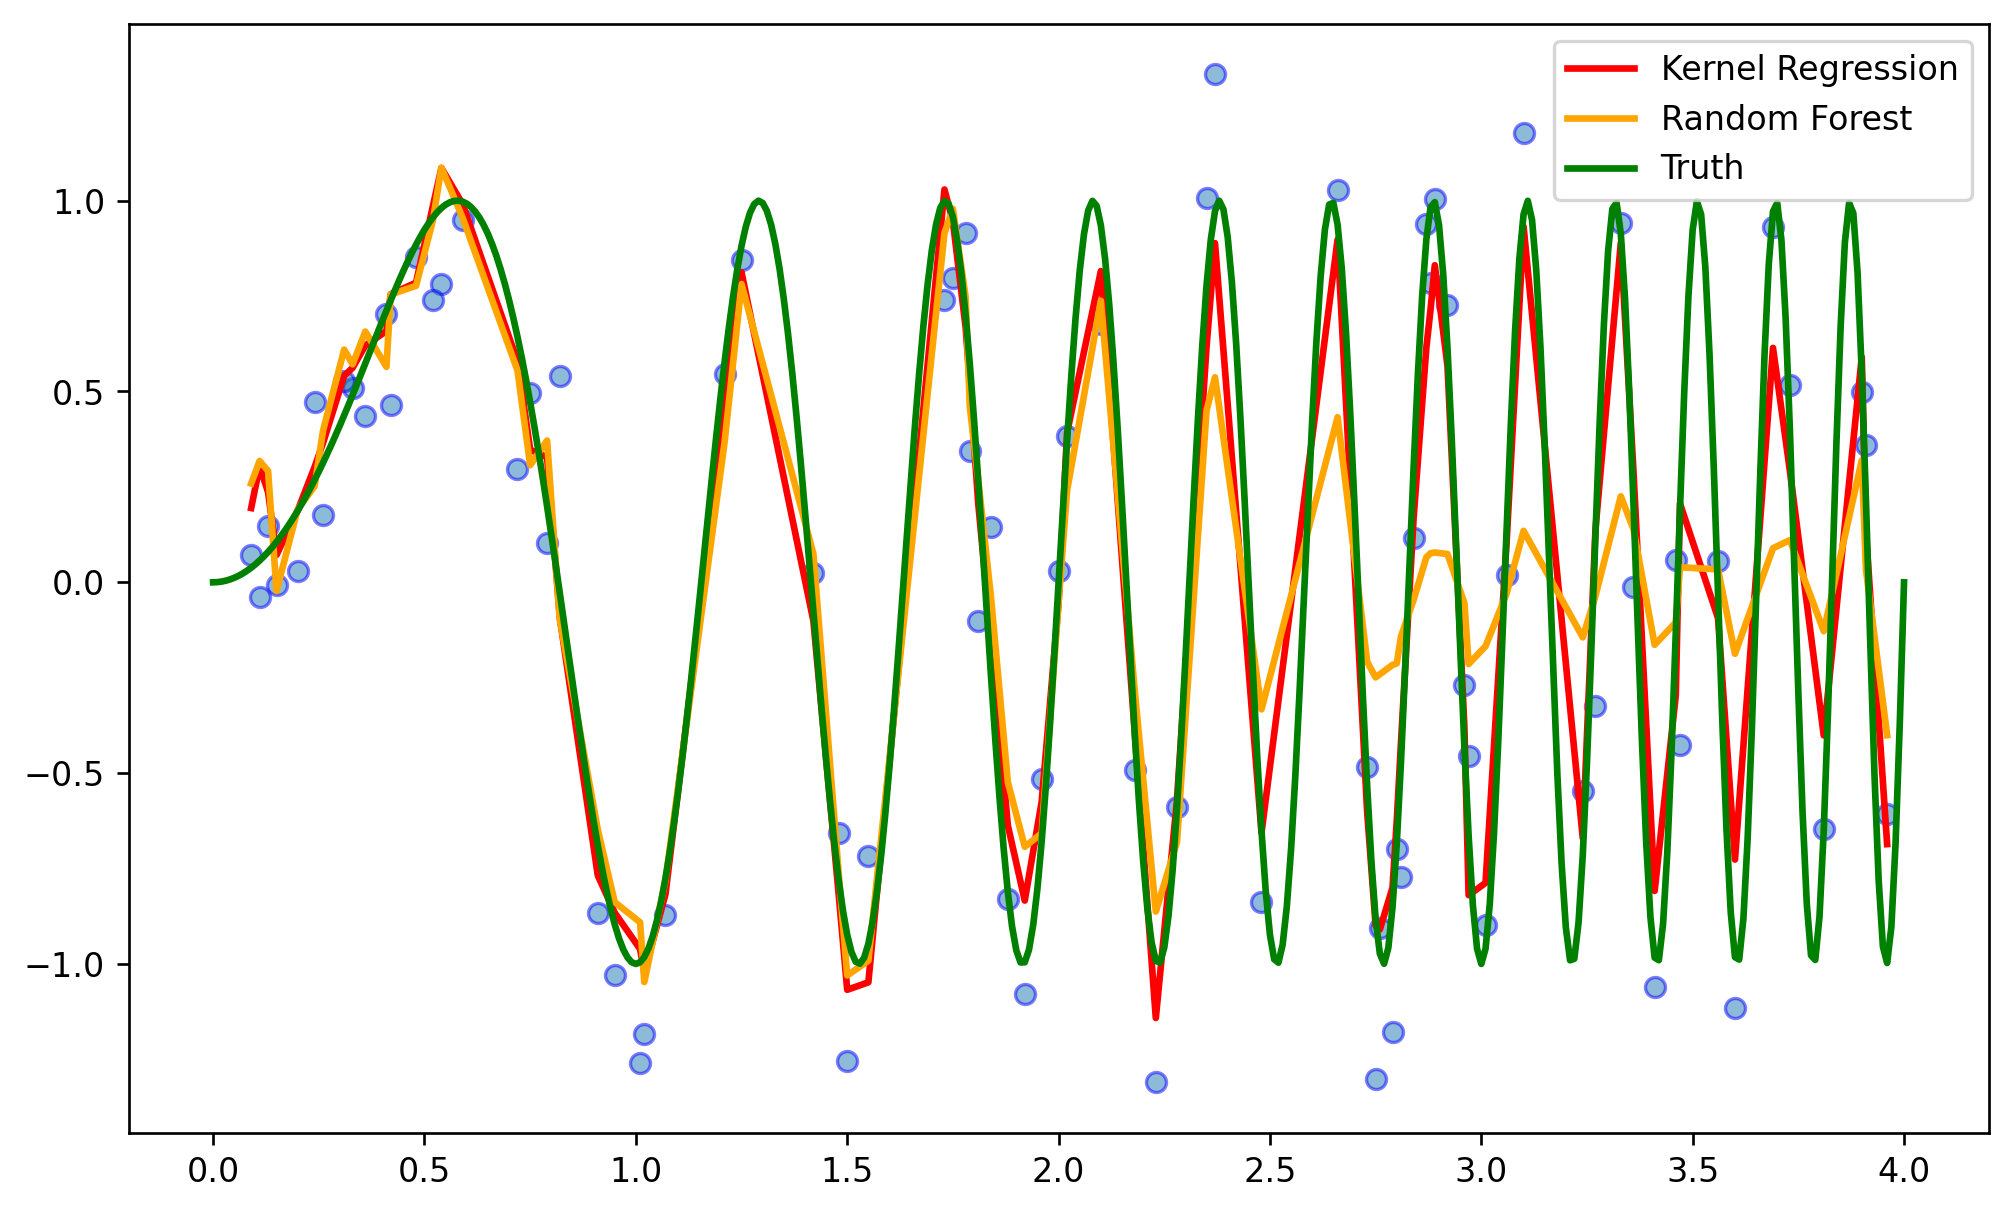

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(xtest,ytest,ec='blue',alpha=0.5)
plt.plot(xtest[np.argsort(xtest)],model.predict(xtest[np.argsort(xtest)]),color='red',lw=2,label='Kernel Regression')
plt.plot(xtest[np.argsort(xtest)],model_rf.predict(xtest[np.argsort(xtest)].reshape(-1,1)),color='orange',lw=2,label='Random Forest')
plt.plot(x,y,color='green',lw=2,label='Truth')
plt.legend()
plt.show()